In [1]:
from __future__ import division, print_function
!ls
!pwd

1kb_around_optimal_or_conservative_peaks.bed.gz  negatives_train.fa
all_negatives.fa				 negatives_train_set.bed.gz
all_positives.fa				 neg_set_full.bed.gz
bg_dnase.bed.gz					 nrkmers.fa
compute_auroc.py				 nrkmers_scores.txt
conservative_peaks.bed.gz			 optimal_peaks.bed.gz
gandhietalpwms_models.meme			 positive_set_full.bed
gen_dinuc_balanced.sh				 positive_set_full.bed.gz
gen_dinucleotide_freqs.py			 positives_test.fa
gkmexplain_positives_hypimpscores.txt		 positives_test_set.bed.gz
gkmexplain_positives_impscores.txt		 positives_train.fa
gkmsvm						 positives_train_set.bed.gz
gkmsvm-2.0.tar.gz				 preds_test_negatives.txt
hg19.genome.fa					 preds_test_positives.txt
hg19.genome.fa.fai				 prefiltered_neg_set.bed.gz
lsgkm_defaultsettings_t2.model.txt		 prep_data_and_train_model.sh
motifResults					 run_gkmexplain.sh
Nanog scores analysis.ipynb			 run_homer.sh
negatives_test.fa				 subsampled_neg_set.bed.gz
negatives_test_set.bed.gz
/users/avanti/gkmexplain/train_lsgkm_on_encode/

In [2]:
import numpy as np
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            
#read in the fasta files and one-hot encode
fasta_seqs = [x.rstrip() for (i,x) in enumerate(open("positives_test.fa"))
              if i%2==1]
#filter out any sequences that contain 'N's
onehot_data = [np.array(one_hot_encode_along_channel_axis(x))
                         for x in fasta_seqs if ('N' not in x)]
print(len(onehot_data))

960


In [7]:
import gzip
import numpy as np

#filter out any sequences that contain 'N's
hyp_impscores = [w[0] for w in zip([
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("gkmexplain_positives_hypimpscores.txt")
],fasta_seqs) if 'N' not in w[1]]

impscores = [w[0] for w in zip([
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("gkmexplain_positives_impscores.txt")
],fasta_seqs) if 'N' not in w[1]]

In [8]:
#sanity check
print(np.max([np.max(np.abs(z*y - x)) for x,y,z in zip(impscores,onehot_data,hyp_impscores)]))

0.0


1.9667603607


TF-MoDISco is using the TensorFlow backend.


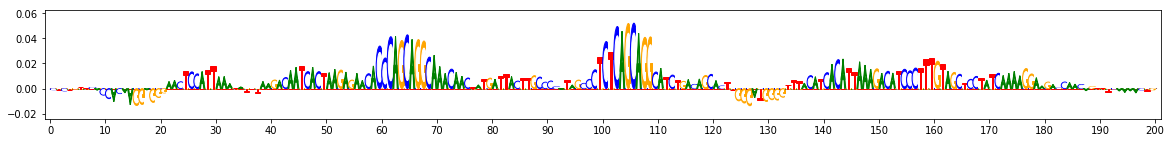

1.150357368134


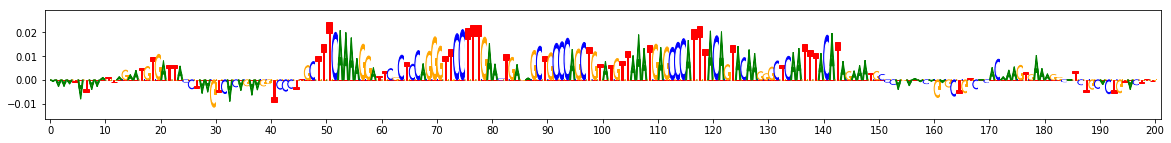

0.9510791799


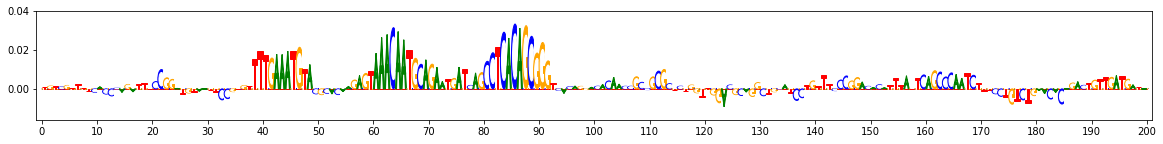

0.7983162303


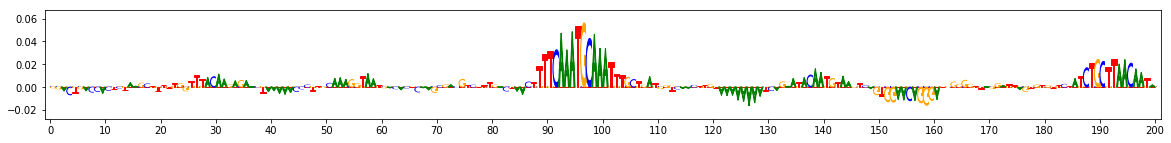

0.6428976399999999


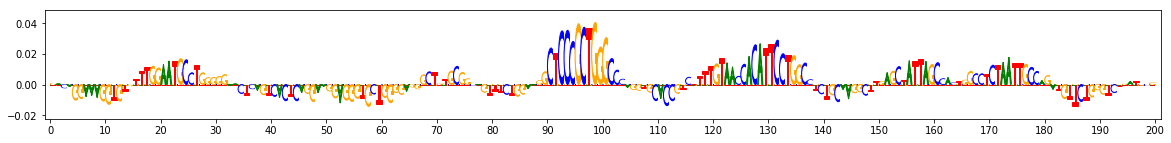

0.5281180124


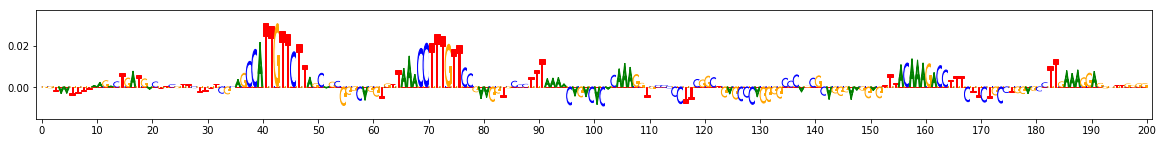

0.3870451210000001


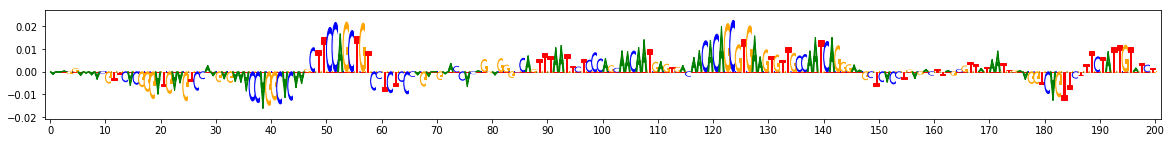

0.22404858699999997


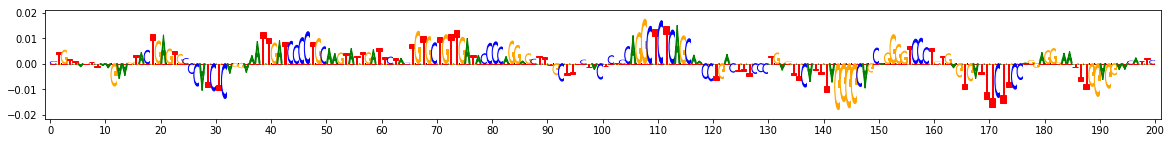

0.028276778999999974


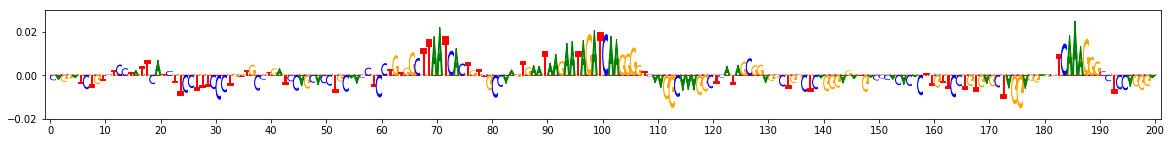

-0.21773746509999997


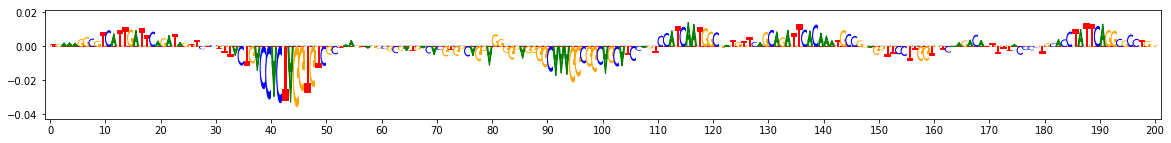

In [9]:
import modisco
from modisco.visualization import viz_sequence
%matplotlib inline

sorted_indices = [x[0] for x in sorted(enumerate([np.sum(x) for x in impscores]), key=lambda x: -x[1])]
for idx in sorted_indices[::int(len(sorted_indices)/10)]:
    print(np.sum(impscores[idx]))
    viz_sequence.plot_weights(impscores[idx], subticks_frequency=10)

On task task0
Computing windowed sums
Computing threshold
peak(mu)= -0.002086674729818322
Manually adjusting thresholds to get desired num seqlets
Mu: -2.086675e-03 +/- 5.514169e-07
Lablace_b: 0.0653415738810168 and 0.11916714451411858
Thresholds: -0.1923209147382831 and 0.18814756527864646
#fdrs pass: 0 and 0
CDFs: 0.9455994685902123 and 0.7973682209907834
Est. FDRs: 1.0 and 1.0


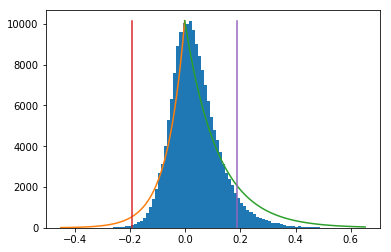

Got 734 coords
After resolving overlaps, got 734 seqlets
Across all tasks, the weakest laplace threshold used was: 0.7973681209907835
734 identified in total
Reducing weak_threshold_for_counting_sign to match laplace_threshold_cdf, from 0.99 to 0.7973681209907835
1 activity patterns with support >= 100 out of 3 possible patterns
Metacluster sizes:  [698]
Idx to activities:  {0: '1'}
On metacluster 0
Metacluster size 698
Relevant tasks:  ('task0',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 698
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings
Finished embedding computation in 3.45 s
Starting affinity matrix computations
Normalization computed in 0.06 s
Cosine similarity mat computed in 0.14 s
Normalization computed in 0.02 s
Cosine similarity mat computed in 0.09 s
Finished affinity matrix computations in 0.24 s
(Round 1) Compute nearest neighbors from coarse affmat
Computed nearest neighbors in 0.03 s


Using TensorFlow backend.


Job completed in: 12.98 s
Launching nearest neighbors affmat calculation job
Job completed in: 13.07 s
(Round 1) Computed affinity matrix on nearest neighbors in 27.4 s
Filtered down to 677 of 698
(Round 1) Retained 677 rows out of 698 after filtering
(Round 1) Computing density adapted affmat
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 677 samples in 0.000s...
[t-SNE] Computed neighbors for 677 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 677 / 677
[t-SNE] Mean sigma: 0.235624
(Round 1) Computing clustering
Beginning preprocessing + Louvain
Wrote graph to binary file in 0.0357549190521 seconds
Running Louvain modularity optimization


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.6s finished


Louvain completed 200 runs in 4.19811892509 seconds
Wrote graph to binary file in 0.16264796257 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.632254
After 3 runs, maximum modularity is Q = 0.63327
After 8 runs, maximum modularity is Q = 0.636664
Louvain completed 58 runs in 2.82314705849 seconds
Preproc + Louvain took 7.37115502357 s
Got 7 clusters after round 1
Counts:
{0: 207, 1: 169, 2: 146, 3: 65, 4: 48, 5: 40, 6: 2}
(Round 1) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 207 seqlets
Trimmed 4 out of 207
Skipped 24 seqlets
Aggregating for cluster 1 with 169 seqlets
Trimmed 19 out of 169
Skipped 24 seqlets
Aggregating for cluster 2 with 146 seqlets
Trimmed 5 out of 146
Skipped 18 seqlets
Aggregating for cluster 3 with 65 seqlets
Trimmed 2 out of 65
Skipped 11 seqlets
Aggregating for cluster 4 with 48 seqlets
Trimmed 2 out of 48
Skipped 8 seqlets
Aggregating for cluster 5 with 40 seqlets
Trimmed 1 out of 40
Skipped 7 se

[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.7s finished


Louvain completed 200 runs in 4.14392995834 seconds
Wrote graph to binary file in 0.144078969955 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.541866
After 2 runs, maximum modularity is Q = 0.572748
After 21 runs, maximum modularity is Q = 0.579817
Louvain completed 71 runs in 3.30224490166 seconds
Preproc + Louvain took 7.74848985672 s
Got 5 clusters after round 2
Counts:
{0: 201, 1: 155, 2: 142, 3: 43, 4: 11}
(Round 2) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 201 seqlets
Trimmed 30 out of 201
Aggregating for cluster 1 with 155 seqlets
Trimmed 11 out of 155
Skipped 4 seqlets
Aggregating for cluster 2 with 142 seqlets
Trimmed 31 out of 142
Aggregating for cluster 3 with 43 seqlets
Trimmed 15 out of 43
Aggregating for cluster 4 with 11 seqlets
Trimmed 0 out of 11
Skipped 1 seqlets
Got 5 clusters
Splitting into subclusters...
Inspecting for spurious merging
Wrote graph to binary file in 0.0216619968414 seconds
Running 

In [10]:
%matplotlib inline
import modisco

#normalize the hyp scores such that, at each position, hypothetical importance
# scores that have the same sign as the original importance score all sum
# up to the original importance score value. The rationale is that if
# multiple different bases at a position could produce a similar score,
# the specific identity of each individual base is less important.
#Empirically, hypothetical scores like these appear to work better for
# motif discovery. Using normalized importance scores derived by taking
# the elementwise product of the normalized hypothetical scores and
# the one-hot encoding also seems to reduce noise.
normed_hyp_scores = []
normed_impscores = []
for i in range(len(impscores)):
    imp_score_each_pos = np.sum(impscores[i],axis=-1)
    imp_score_sign_each_pos = np.sign(imp_score_each_pos)
    hyp_scores_same_sign_mask = (np.sign(hyp_impscores[i])*imp_score_sign_each_pos[:,None] > 0)
    hyp_scores_same_sign_imp_scores_sum = np.sum(hyp_impscores[i]*hyp_scores_same_sign_mask,axis=-1)
    norm_ratio = imp_score_each_pos/hyp_scores_same_sign_imp_scores_sum
    norm_hyp = hyp_impscores[i]*norm_ratio[:,None]
    normed_hyp_scores.append(norm_hyp)
    normed_impscores.append(norm_hyp*onehot_data[i])
    
tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                        #Unfortunately, at the time of writing,
                        # min_seqlets_per_task is not the actual number of seqlets
                        # that will end up being produced per task, but it
                        # serves as a rough target
                        #The reason for the difference is that many candidate seqlet windows
                        # will get discarded due to overlap with other windows
                        # and it's hard to predict how many
                        #The code is still in development, so I will likely
                        # refine this option later to correspond to the actual
                        # minimum number of seqlets produced per task
                        min_seqlets_per_task=1000,
                        seqlets_to_patterns_factory=
                            modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                                #Adjust trim_to_window_size and initial_flank_to_add
                                # according to how big you expect
                                # the core motif to be; default value is 10
                                #trim_to_window_size=6,
                                #initial_flank_to_add=2,
                                #final_flank_to_add=5,
                                #kmer_len, num_gaps and num_mismatches are used to
                                # derive kmer embeddings for coarse-grained affinity
                                # matrix calculation. kmer_len=6, num_gaps=1
                                # and num_mismatches=0 means
                                # that kmer embeddings using 6-mers with 1 gap will be
                                # used.
                                kmer_len=6, num_gaps=1,
                                num_mismatches=0,
                        ),
                   )(
                task_names=["task0"],
                contrib_scores={'task0': normed_impscores},                
                hypothetical_contribs={'task0': normed_hyp_scores},
                one_hot=onehot_data)

num seqlets 176
fwd


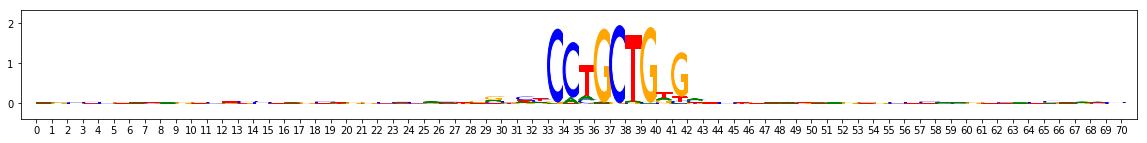

Contrib scores


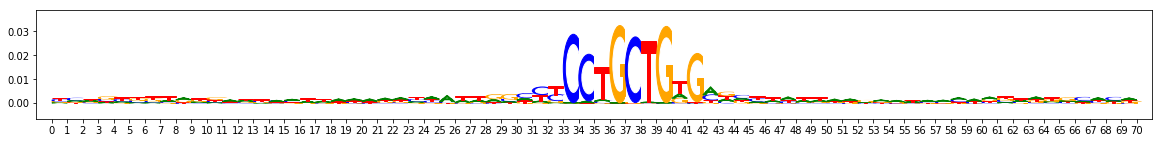

Hyp contrib scores


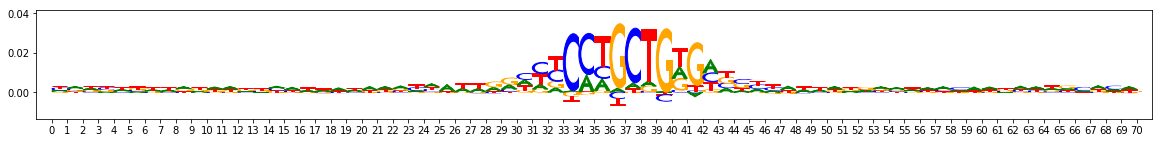

rev


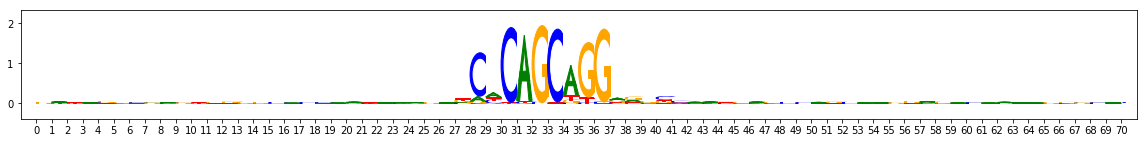

Contrib scores


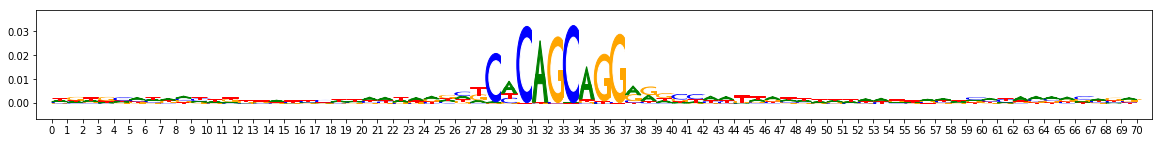

Hyp contrib scores


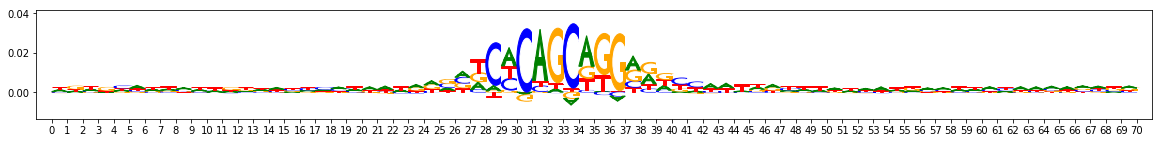

num seqlets 109
fwd


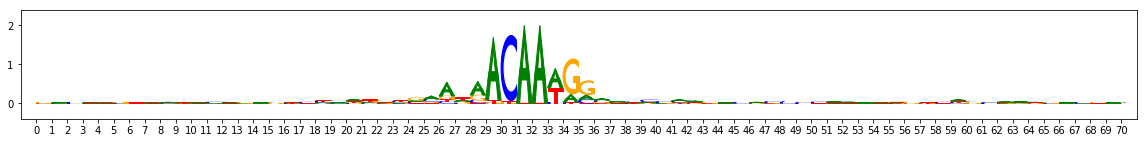

Contrib scores


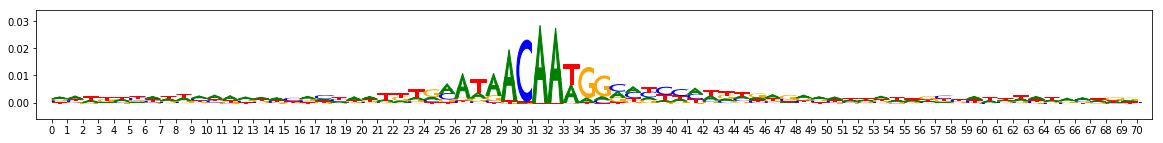

Hyp contrib scores


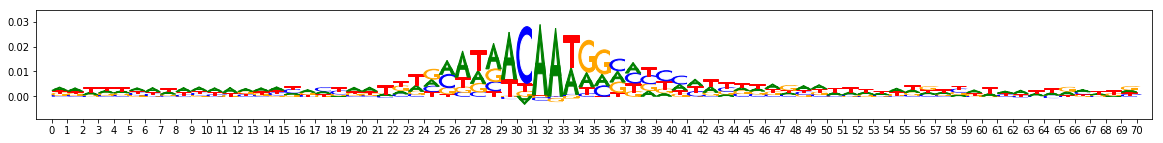

rev


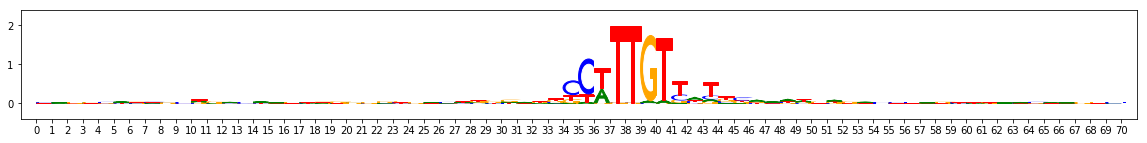

Contrib scores


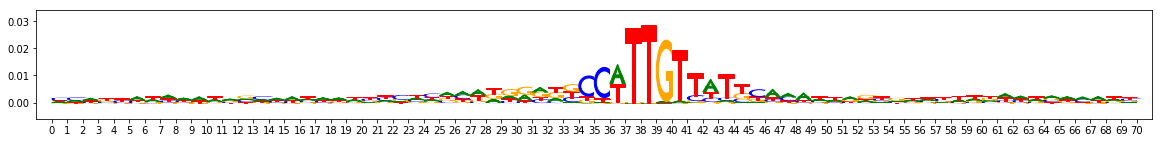

Hyp contrib scores


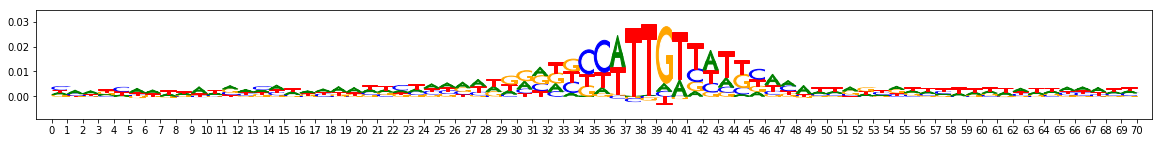

num seqlets 88
fwd


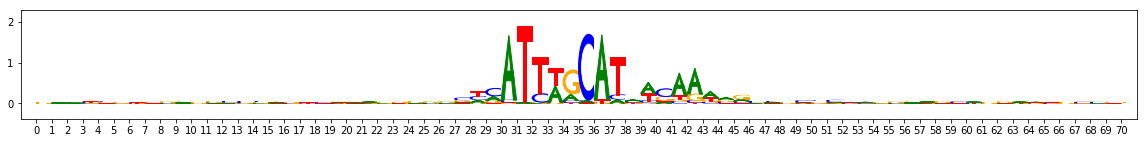

Contrib scores


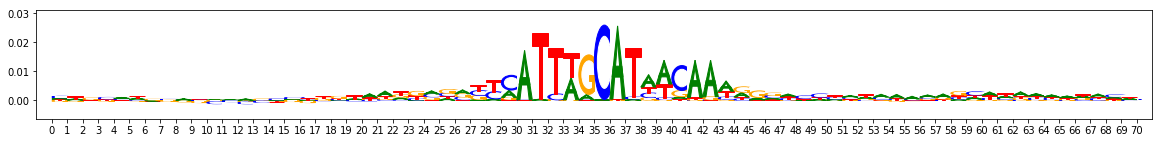

Hyp contrib scores


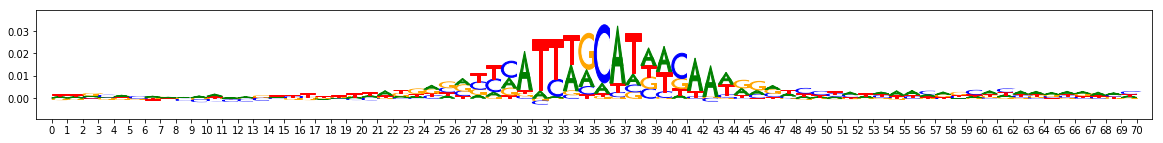

rev


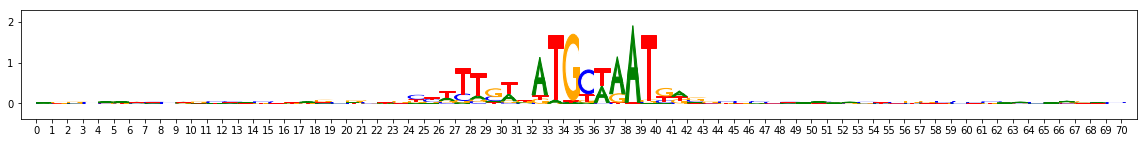

Contrib scores


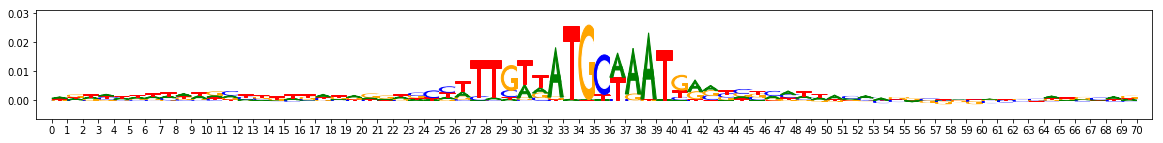

Hyp contrib scores


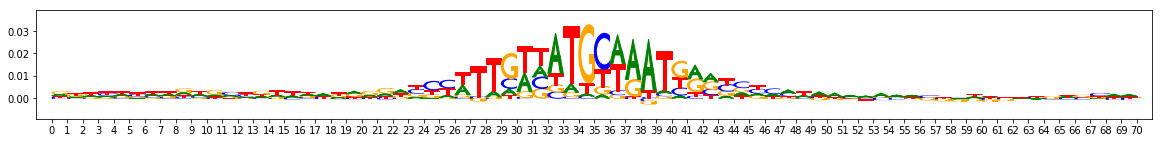

num seqlets 69
fwd


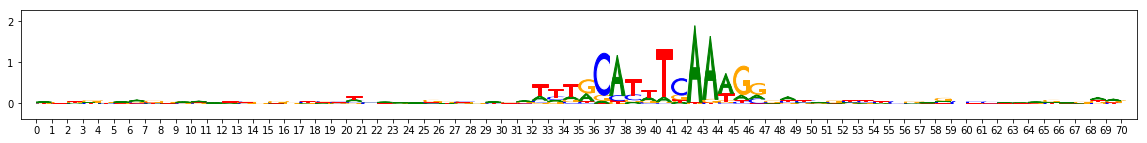

Contrib scores


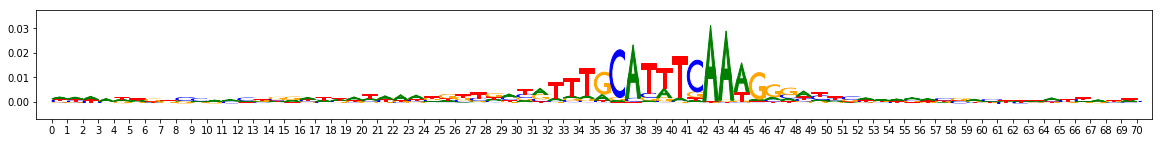

Hyp contrib scores


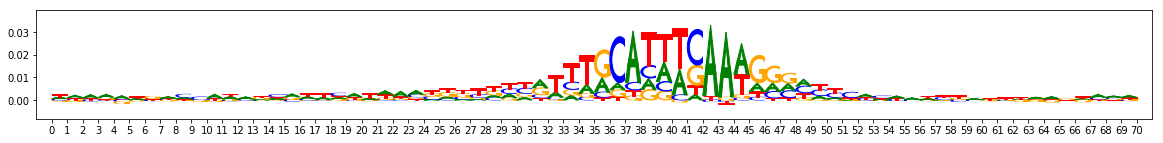

rev


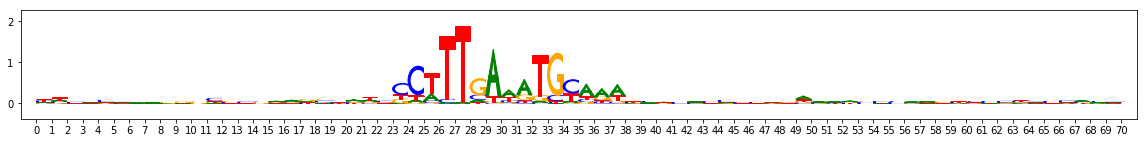

Contrib scores


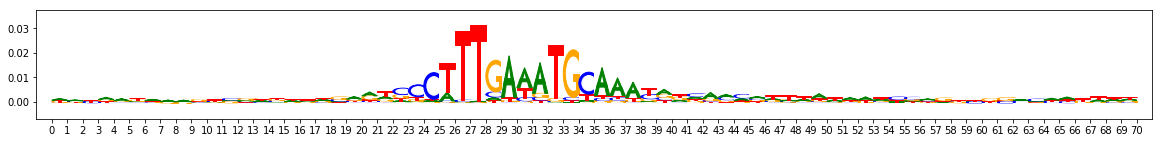

Hyp contrib scores


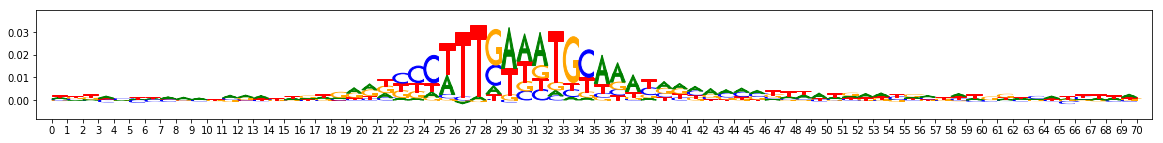

In [16]:
for i,pattern in enumerate(tfmodisco_results.metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result.patterns):
    print("num seqlets",len(pattern.seqlets))
    print("fwd")
    viz_sequence.plot_weights(viz_sequence.ic_scale(
        pattern["sequence"].fwd, background=np.array([0.25,0.25,0.25,0.25])))
    print("Contrib scores")
    viz_sequence.plot_weights(pattern["task0_contrib_scores"].fwd)
    print("Hyp contrib scores")
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].fwd)
  
    print("rev")
    viz_sequence.plot_weights(viz_sequence.ic_scale(
      pattern["sequence"].rev, background=np.array([0.25,0.25,0.25,0.25])))
    print("Contrib scores")
    viz_sequence.plot_weights(pattern["task0_contrib_scores"].rev)
    print("Hyp contrib scores")
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].rev)

In [6]:
#compare to Gandhi et al

!wget http://www.beerlab.org/gkmsvm/downloads/gkmsvm-2.0.tar.gz -O gkmsvm-2.0.tar.gz
!tar -xzf gkmsvm-2.0.tar.gz

--2019-01-28 22:56:06--  http://www.beerlab.org/gkmsvm/downloads/gkmsvm-2.0.tar.gz
Resolving www.beerlab.org (www.beerlab.org)... 23.229.186.73
Connecting to www.beerlab.org (www.beerlab.org)|23.229.186.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2936492 (2.8M) [application/x-gzip]
Saving to: ‘gkmsvm-2.0.tar.gz’

gkmsvm-2.0.tar.gz   100%[===================>]   2.80M  14.3MB/s    in 0.2s    

2019-01-28 22:56:07 (14.3 MB/s) - ‘gkmsvm-2.0.tar.gz’ saved [2936492/2936492]



In [7]:
!python gkmsvm/scripts/nrkmers.py 10 nrkmers.fa

In [10]:
!~/lsgkm/src/gkmpredict nrkmers.fa lsgkm_defaultsettings_t2.model.txt nrkmers_scores.txt -v 1

In [11]:
!python gkmsvm/scripts/svmw_emalign.py nrkmers_scores.txt 19 gandhietalpwms

INFO  @ Mon, 28 Jan 2019 22:57:11: seed kmer: GATGACATGG 
INFO  @ Mon, 28 Jan 2019 22:57:11: round - 0/100 
INFO  @ Mon, 28 Jan 2019 22:57:12: obj: 470.390391 
INFO  @ Mon, 28 Jan 2019 22:57:12: round - 1/100 
gkmsvm/scripts/svmw_emalign.py:264: RuntimeWarning: invalid value encountered in divide
  model = model / row_sums[:, numpy.newaxis]
INFO  @ Mon, 28 Jan 2019 22:57:13: obj: 0.000000 
INFO  @ Mon, 28 Jan 2019 22:57:13: round - 2/100 
INFO  @ Mon, 28 Jan 2019 22:57:14: obj: 0.000000 
INFO  @ Mon, 28 Jan 2019 22:57:14: skip GATGACATGG (number of kmers aligned is 0 < 100) 
INFO  @ Mon, 28 Jan 2019 22:57:14: seed kmer: ATAAATCACT 
INFO  @ Mon, 28 Jan 2019 22:57:14: round - 0/100 
INFO  @ Mon, 28 Jan 2019 22:57:15: obj: 457.949051 
INFO  @ Mon, 28 Jan 2019 22:57:15: round - 1/100 
INFO  @ Mon, 28 Jan 2019 22:57:15: obj: 0.000000 
INFO  @ Mon, 28 Jan 2019 22:57:15: round - 2/100 
INFO  @ Mon, 28 Jan 2019 22:57:16: obj: 0.000000 
INFO  @ Mon, 28 Jan 2019 22:57:16: skip ATAAATCACT (number

In [12]:
!cat gandhietalpwms_models.meme

MEME version 4

ALPHABET= ACGT

strands: + -

Background letter frequencies (from entire human genome)
A 0.29 C 0.21 G 0.21 T 0.29



motif 1


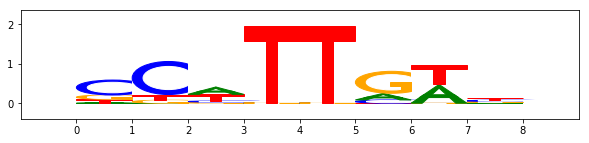

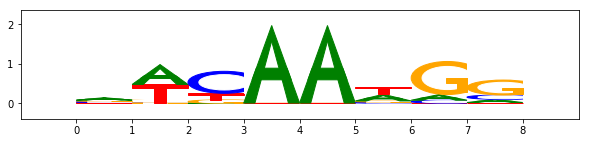

motif 2


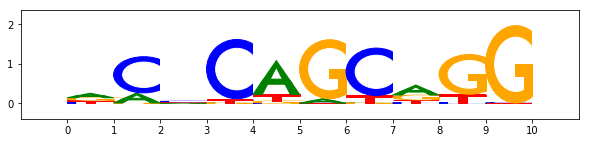

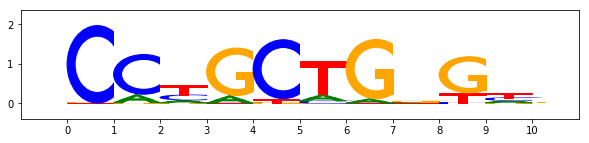

motif 3


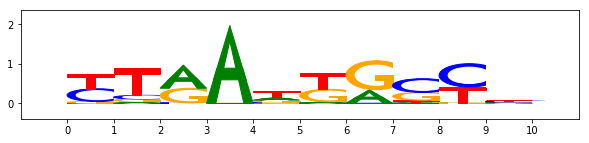

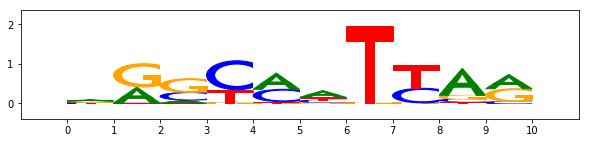

motif 4


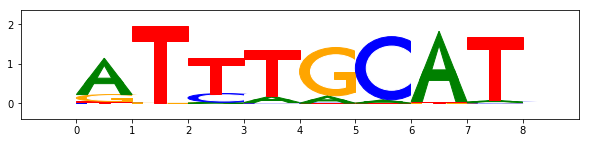

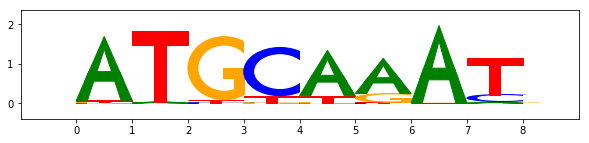

motif 5


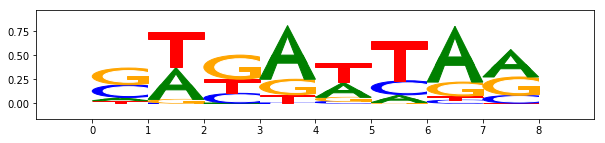

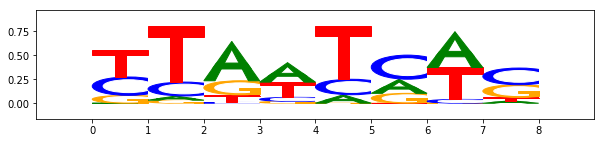

motif 6


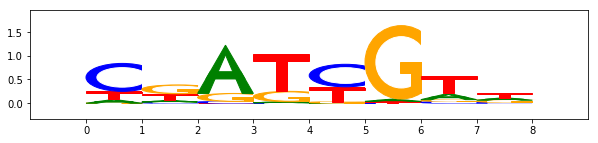

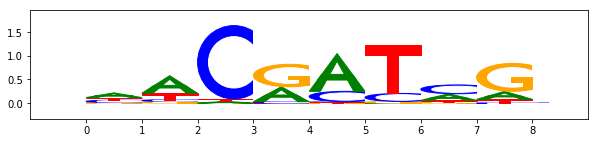

motif 7


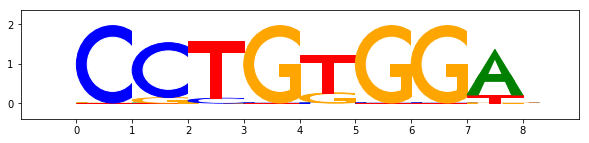

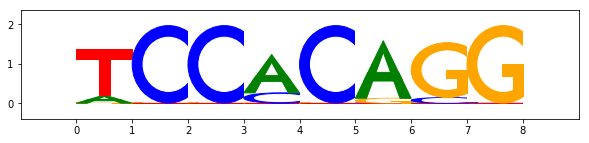

motif 8


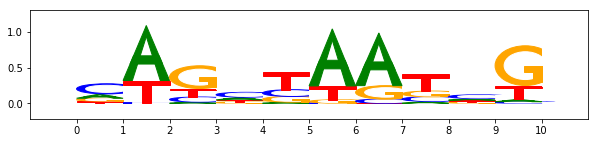

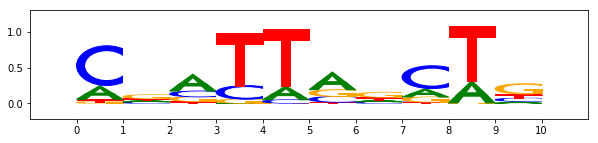

motif 9


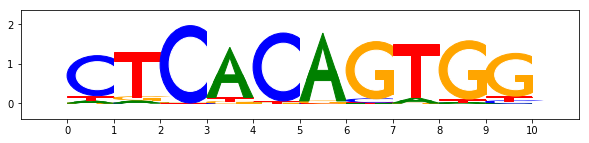

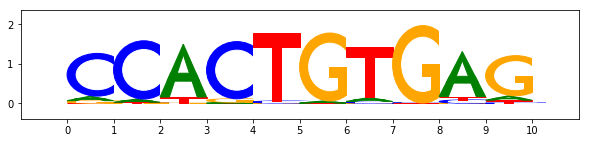

motif 10


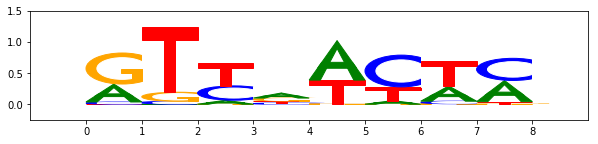

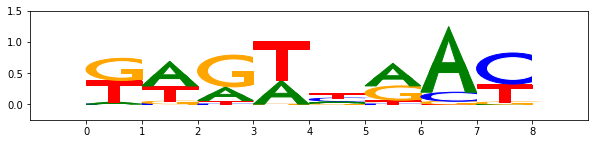

In [20]:
import glob

#HOMER motifs
num_homer_motifs = 10
homer_path = "motifResults"

for i in range(num_homer_motifs):
    print("motif",i+1)
    motif_file = homer_path+"/homerResults/motif"+str(i+1)+".motif"
    pwm_rows = []
    for i,line in enumerate(open(motif_file)):
        if (i > 0):
            pwm_rows.append([float(x) for x in line.rstrip().split("\t")])
    pwm_rows = np.array(pwm_rows)
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pwm_rows),
                                                    background=np.array([0.25, 0.25, 0.25, 0.25])),
                              figsize=(10,2))
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pwm_rows[::-1,::-1]),
                                                    background=np.array([0.25, 0.25, 0.25, 0.25])),
                              figsize=(10,2))